<a href="https://colab.research.google.com/github/CIC-Research/Data-Science-Project/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network
### CIC Data Science Project
By: ....,Neidy Malaga,... (Alphabetical Order)



#### Step 1: Beginning Setup

Our project compares . We start by using pandas to read our data from an Excel file and display it to prove it was read well.

In [45]:
import pandas as pd

Walmart_Data = pd.read_csv('walmart.csv')
Walmart_Data['Product_Category'] = Walmart_Data['Product_Category'].astype('uint8')
Walmart_Data['Purchase'] = Walmart_Data['Purchase'].astype('uint8')
Walmart_Data['Gender'] = Walmart_Data['Gender'].map({'M': 0, 'F': 1})

#Not in use yet
Walmart_Data.drop('Product_ID', axis=1, inplace=True) 
Walmart_Data.drop('User_ID', axis=1, inplace=True)
Walmart_Data.drop('Age', axis=1, inplace=True)
Walmart_Data.drop('City_Category', axis=1, inplace=True)
Walmart_Data.drop('Stay_In_Current_City_Years', axis=1, inplace=True)

Walmart_Data.head()



,Gender,Occupation,Marital_Status,Product_Category,Purchase
0,1,10,0,3,178
1,1,10,0,1,96
2,1,10,0,12,142
3,1,10,0,12,33
4,0,16,0,8,33


#### Step 2: Scatterplot Visual
Let's start by showing the scatterplot to identify the independent and dependent variable. Since we are trying to measure danceability_% over streams, streams will be the response variable (y-val) and danceability_% will be the explanatory variable (x-val).

Now, right away you can see there is a problem with the data. A small amount of values are null. In order to fix this problem, we will use an imputer, as this is its main use. We will be doing this through the help of a pipeline, which will make our code cleaner.

We will only need the numerical_columns, but we also included a way to impute categorical column in the comments for practice. The following code block will show the scatterplot. Based on the scatterplot, we can see that it has a few outliers and that most of the data is 'clustered' to the bottom. We can imply that 2-3 clusters can cover the data, and use this information to confirm our methods in Step 3 when we perform a cluster.

Information about pipelines (Credits): https://www.kaggle.com/code/alexisbcook/pipelines

Information about imputers: https://www.kaggle.com/code/alexisbcook/missing-values

FIX DESCRIPTION LATER

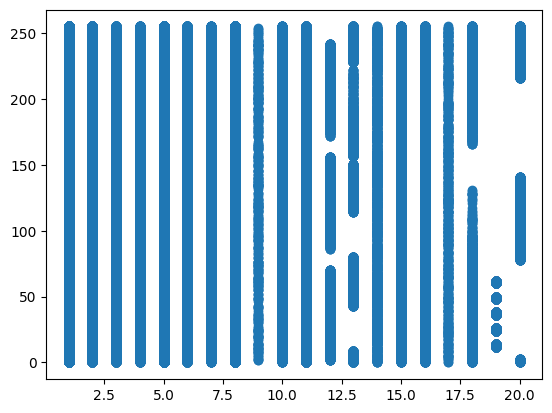

In [46]:
import matplotlib.pyplot as plt

# #set up x,y vals
# stream_data = Spotify_Pipeline_Data['streams']
# mode_data = Spotify_Pipeline_Data['mode']
# 
# #create scatterplot, annotate scatterplot, show scatterplot
# plt.scatter(stream_data, mode_data)
# plt.xlabel('Streams')
# plt.ylabel('Mode (0-Major, 1-Minor)')
# plt.show()

#set up x,y vals
y = Walmart_Data['Purchase']
x = Walmart_Data['Product_Category']

#create scatterplot, annotate scatterplot, show scatterplot
plt.scatter(x, y)

plt.show()



#### Step 3: Clustering Data
In order to cluster data, we will use K-Means algorithm.

Credit: https://www.w3schools.com/python/python_ml_k-means.asp

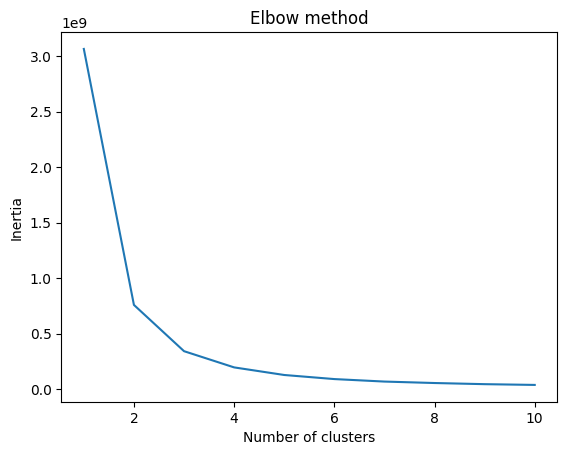

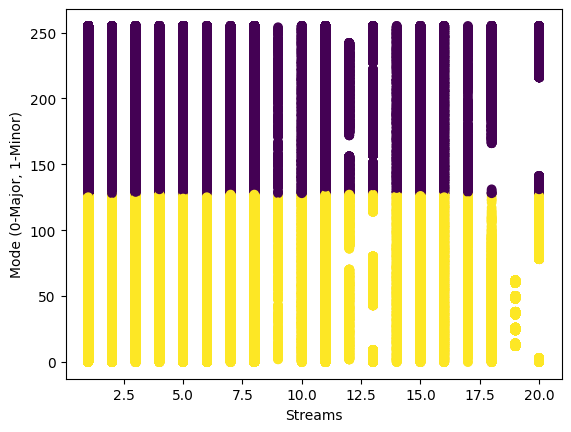

In [47]:
from sklearn.cluster import KMeans


K_Data = pd.DataFrame({'Product_Category': Walmart_Data['Product_Category'],'Purchase': Walmart_Data['Purchase']})

#Elbow Method
inertia = []

for index in range(1,11):
    kmeans = KMeans(n_clusters=index)
    kmeans.fit(K_Data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1,11), inertia)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(K_Data)

plt.scatter(K_Data['Product_Category'], K_Data['Purchase'], c=kmeans.labels_)
plt.xlabel('Streams')
plt.ylabel('Mode (0-Major, 1-Minor)')
plt.show()


#### Step 3: Classification

Random Forest should be correct: validation and training accuracy are close and high values 

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV, train_test_split


# 
x = Walmart_Data.drop('Product_Category', axis=1)
y = Walmart_Data['Purchase']

#splits into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size=0.25)

rf = RandomForestClassifier(max_depth=17)
rf.fit(X_train, Y_train)

#trains model
print('Training Accuracy : ', 
      metrics.accuracy_score(Y_train,
                             rf.predict(X_train))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(Y_test, 
                             rf.predict(X_test))*100)


Training Accuracy :  90.0931036405196
Validation Accuracy :  88.26835954827403


https://www.geeksforgeeks.org/understanding-logistic-regression/

Logistic Regression
Possible Error: Overfitting (100 percent for both is suspicous)

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y =  Walmart_Data['Marital_Status']
x = Walmart_Data.drop('Purchase',axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2)

clf = LogisticRegression(penalty='l2')
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, y_pred)

print('Training Accuracy : ', 
      metrics.accuracy_score(Y_train,
                             clf.predict(X_train))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(Y_test, 
                             clf.predict(X_test))*100)


Training Accuracy :  100.0
Validation Accuracy :  100.0


https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn?irclickid=WuFREi2XYxyKROHzIjScF1YNUkHXA5U5QXLp0w0&irgwc=1&utm_medium=affiliate&utm_source=impact&utm_campaign=000000_1-2003851_2-mix_3-all_4-na_5-na_6-na_7-mp_8-affl-ip_9-na_10-bau_11-Bing%20Rebates%20by%20Microsoft&utm_content=BANNER&utm_term=EdgeBingFlow - KNN

Possible Error: Overfitting ???

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = Walmart_Data.drop('Product_Category', axis=1)
y = Walmart_Data['Purchase']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Training Accuracy : ', acc*100)


Training Accuracy :  99.95091533804789


Naive Bayes
Possible Error: Overfitting (100 percent for both is suspicous)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
x = Walmart_Data.drop('Product_Category', axis=1)
y = Walmart_Data['Purchase']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

MB = GaussianNB()
MB.fit(X_train, y_train)

print('Training Accuracy : ', 
      metrics.accuracy_score(y_train,
                             MB.predict(X_train))*100)
print('Validation Accuracy : ', 
      metrics.accuracy_score(y_test, 
                             MB.predict(X_test))*100)

Training Accuracy :  100.0
Validation Accuracy :  100.0
